### Import Required Libraries

In [1]:
import pandas as pd

# Đọc bộ dữ liệu
df = pd.read_csv('data/WPP2022_PopulationBySingleAgeSex_Medium_1950-2021.csv')

# Danh sách các châu lục
continents = ['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'Northern America', 'Oceania']

# Lọc dữ liệu theo các châu lục
df_continents = df[df['Location'].isin(continents)]

# Lưu kết quả vào một file mới
df_continents.to_csv('data/result/1950-2021.csv', index=False)

print("Dữ liệu đã được lưu vào file 'data/result/1950-2021.csv'")

/var/folders/n2/24d3qqqs7794tlg7x2vw59vc0000gn/T/ipykernel_19656/3431483763.py:4: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/WPP2022_PopulationBySingleAgeSex_Medium_1950-2021.csv')


Dữ liệu đã được lưu vào file 'data/result/1950-2021.csv'




### Load and Preprocess Data



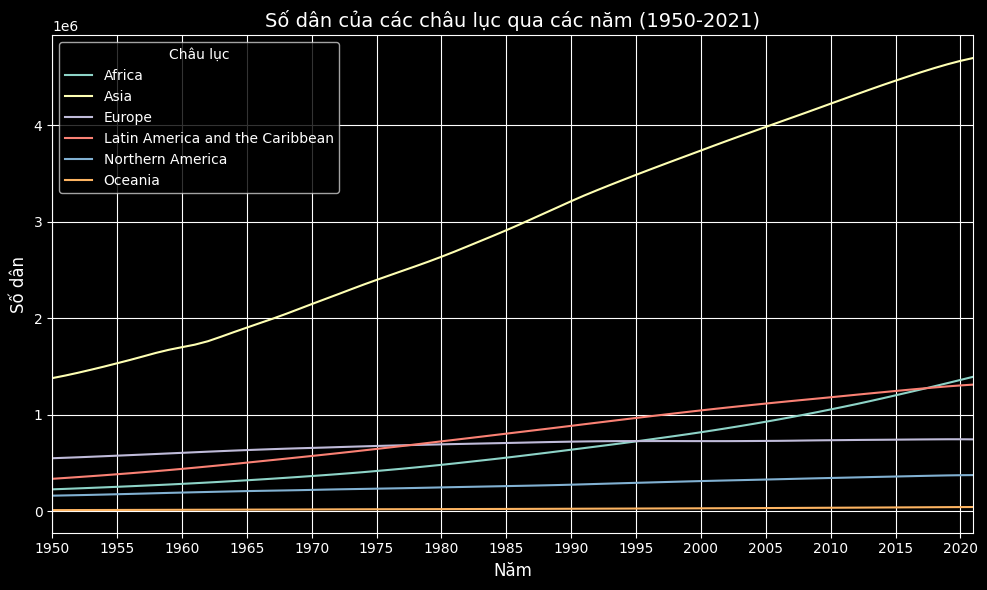

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc bộ dữ liệu
df = pd.read_csv('data/result/1950-2021.csv')

# Lọc dữ liệu chỉ chứa các năm từ 1950 đến 2021
df = df[df['Time'] >= 1950]
df = df[df['Time'] <= 2021]

# Danh sách các châu lục
continents = ['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'Northern America', 'Oceania']

# Lọc dữ liệu cho các châu lục
df_continents = df[df['Location'].isin(continents)]

# Tính tổng số dân cho mỗi châu lục qua các năm
df_continents_grouped = df_continents.groupby(['Time', 'Location'])['PopTotal'].sum().reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))

for continent in continents:
    # Lọc dữ liệu cho mỗi châu lục
    df_continent = df_continents_grouped[df_continents_grouped['Location'] == continent]
    plt.plot(df_continent['Time'], df_continent['PopTotal'], label=continent)

# Thiết lập các chi tiết cho biểu đồ
plt.title('Số dân của các châu lục qua các năm (1950-2021)', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số dân', fontsize=12)
plt.legend(title='Châu lục')
plt.grid(True)
plt.xticks(range(1950, 2022, 5))  # Hiển thị mỗi 5 năm

# Đảm bảo trục x kết thúc ở năm 2021
plt.xlim(1950, 2021)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



### Population Distribution by Gender in 2021



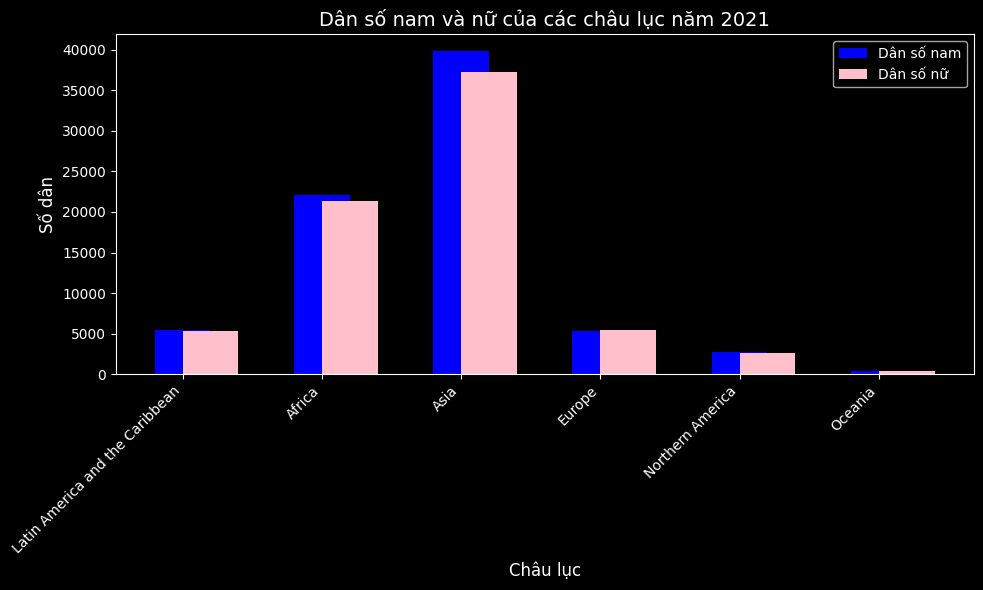

In [3]:
df_2021 = df_continents[df_continents['Time'] == 2021]

plt.figure(figsize=(10, 6))
x = df_2021['Location']
plt.bar(x, df_2021['PopMale'], width=0.4, label='Dân số nam', align='center', color='blue')
plt.bar(x, df_2021['PopFemale'], width=0.4, label='Dân số nữ', align='edge', color='pink')

plt.title('Dân số nam và nữ của các châu lục năm 2021', fontsize=14)
plt.xlabel('Châu lục', fontsize=12)
plt.ylabel('Số dân', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



### Population Distribution by Age Groups



/var/folders/n2/24d3qqqs7794tlg7x2vw59vc0000gn/T/ipykernel_19656/849455878.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Nhóm tuổi')


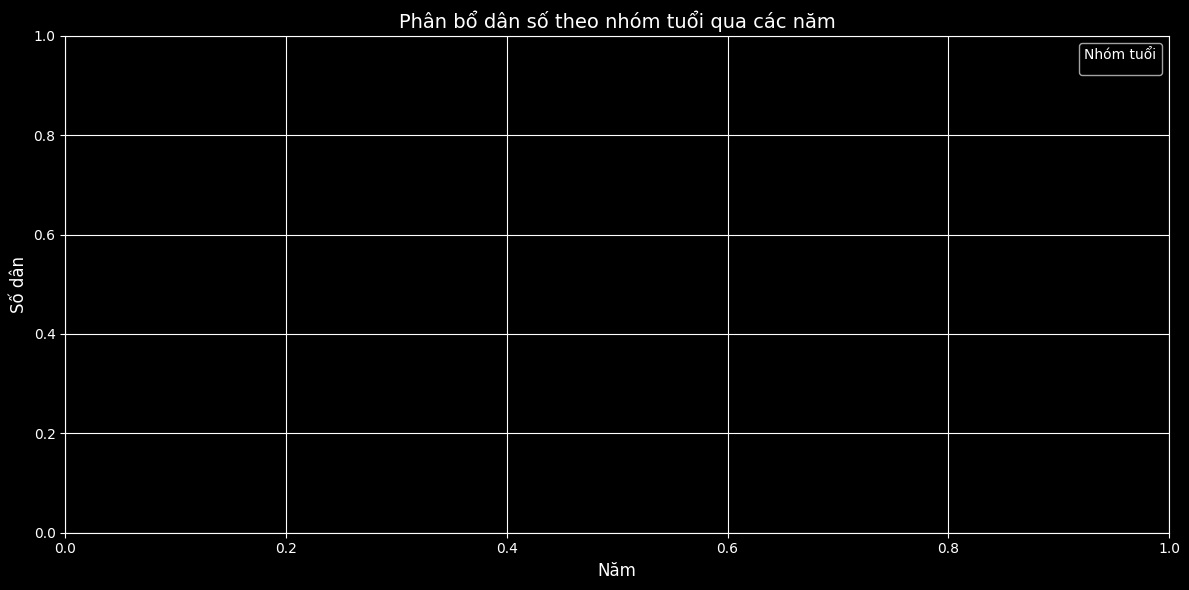

In [4]:
df_age_groups = df_continents[df_continents['AgeGrp'].isin([0, 5, 10, 15, 20, 25, 30])]  # Chọn các nhóm tuổi cụ thể

df_age_grouped = df_age_groups.groupby(['Time', 'AgeGrp', 'Location'])['PopTotal'].sum().reset_index()

# Vẽ biểu đồ cột cho các nhóm tuổi trong các năm
plt.figure(figsize=(12, 6))
for age_group in df_age_grouped['AgeGrp'].unique():
    df_group = df_age_grouped[df_age_grouped['AgeGrp'] == age_group]
    plt.plot(df_group['Time'], df_group['PopTotal'], label=f'Nhóm tuổi {age_group}-{age_group+4}')

plt.title('Phân bổ dân số theo nhóm tuổi qua các năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số dân', fontsize=12)
plt.legend(title='Nhóm tuổi')
plt.grid(True)
plt.tight_layout()
plt.show()



### Population Comparison Between 1950 and 2021



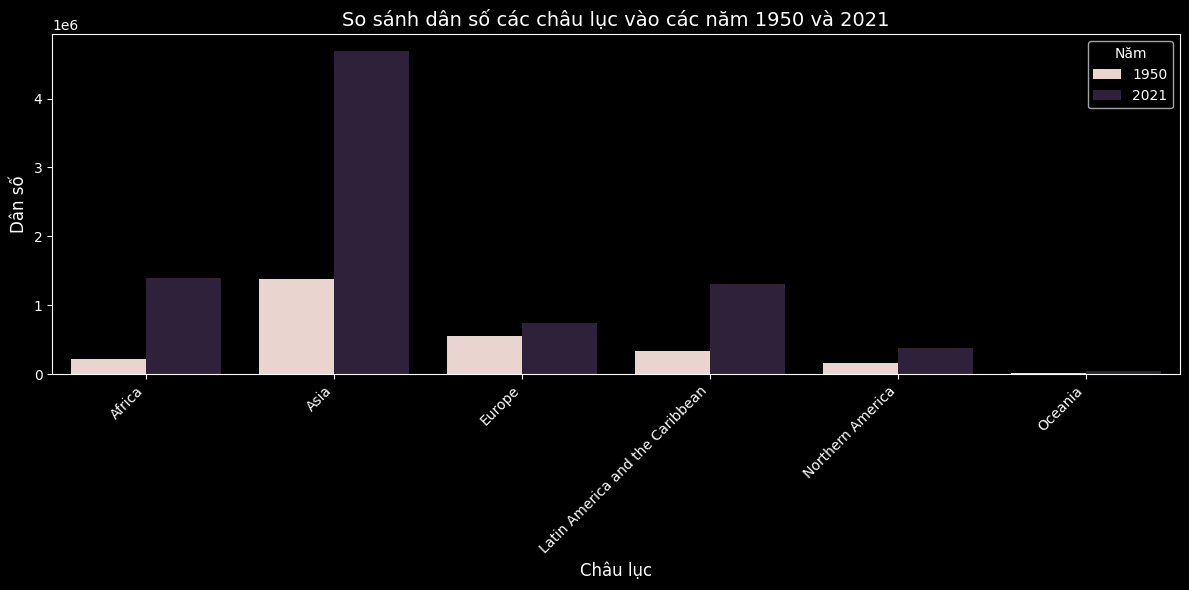

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử df là DataFrame chứa bộ dữ liệu của bạn
df_1950_2021 = df[df['Time'].isin([1950, 2021])]

# Nhóm dữ liệu theo năm và châu lục, tính tổng dân số
df_grouped = df_1950_2021.groupby(['Time', 'Location'])['PopTotal'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Location', y='PopTotal', hue='Time')
plt.title('So sánh dân số các châu lục vào các năm 1950 và 2021', fontsize=14)
plt.xlabel('Châu lục', fontsize=12)
plt.ylabel('Dân số', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Năm')
plt.tight_layout()
plt.show()



### Stacked Bar Chart of Population Over the Years



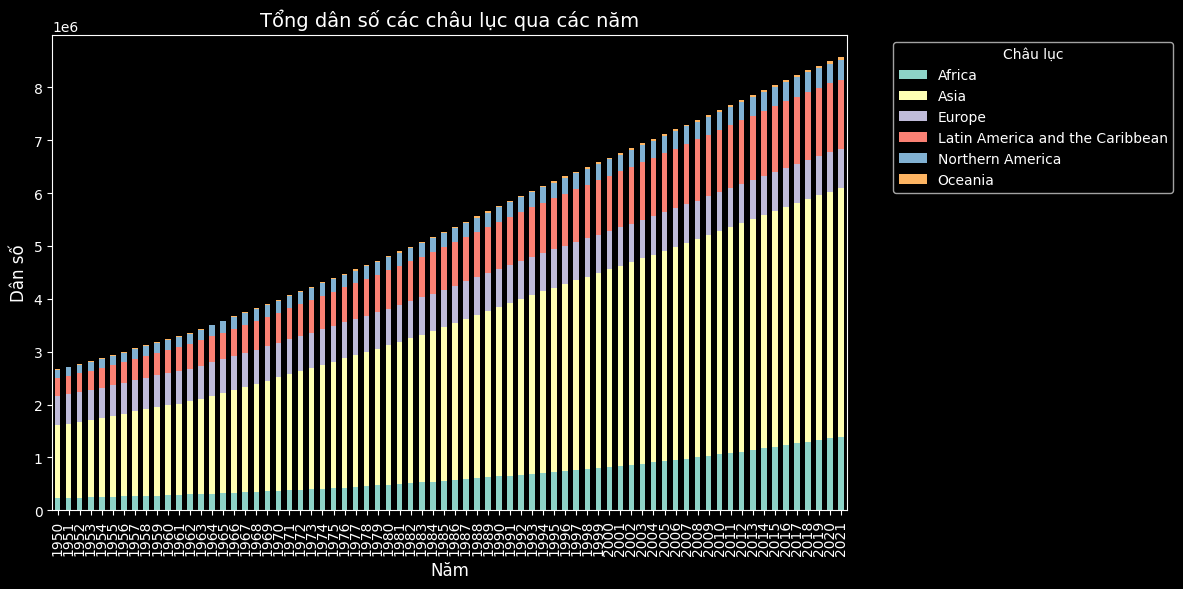

In [6]:
# Nhóm dữ liệu theo năm và châu lục, tính tổng dân số
df_stacked = df.groupby(['Time', 'Location'])['PopTotal'].sum().unstack().fillna(0)

# Vẽ biểu đồ cột chồng
df_stacked.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Tổng dân số các châu lục qua các năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Dân số', fontsize=12)
plt.legend(title='Châu lục', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Population Distribution in 2021



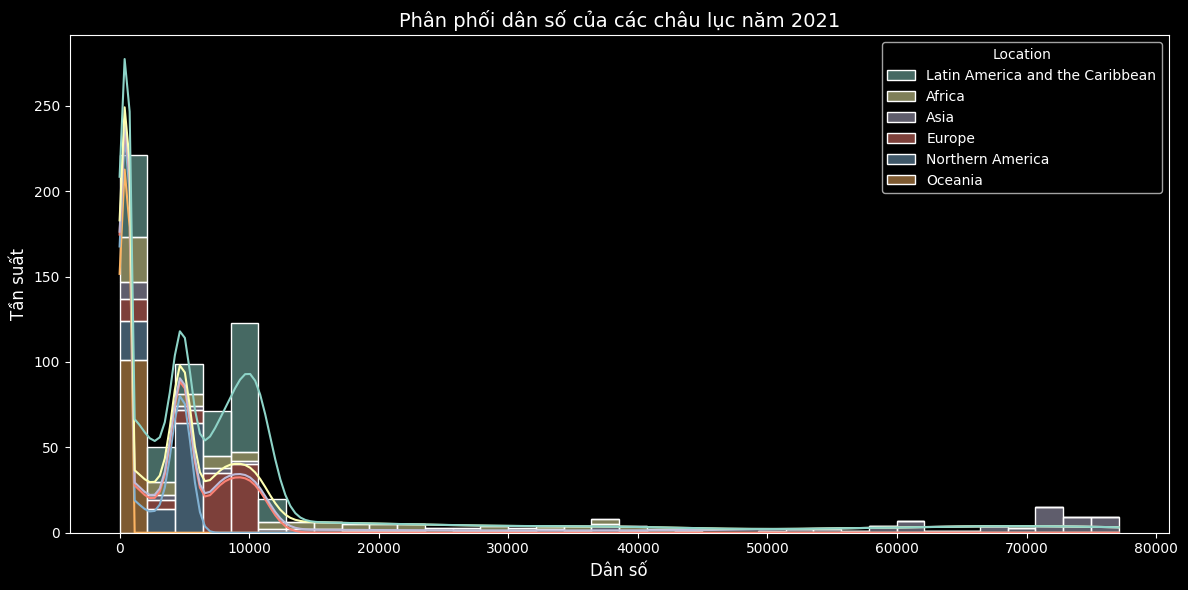

In [7]:
# Lọc dữ liệu cho năm 2021
df_2021 = df[df['Time'] == 2021]

# Vẽ biểu đồ phân phối cho dân số từng châu lục
plt.figure(figsize=(12, 6))
sns.histplot(data=df_2021, x='PopTotal', hue='Location', kde=True, multiple='stack')
plt.title('Phân phối dân số của các châu lục năm 2021', fontsize=14)
plt.xlabel('Dân số', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.tight_layout()
plt.show()



### Scatter Plot of Population Over the Years



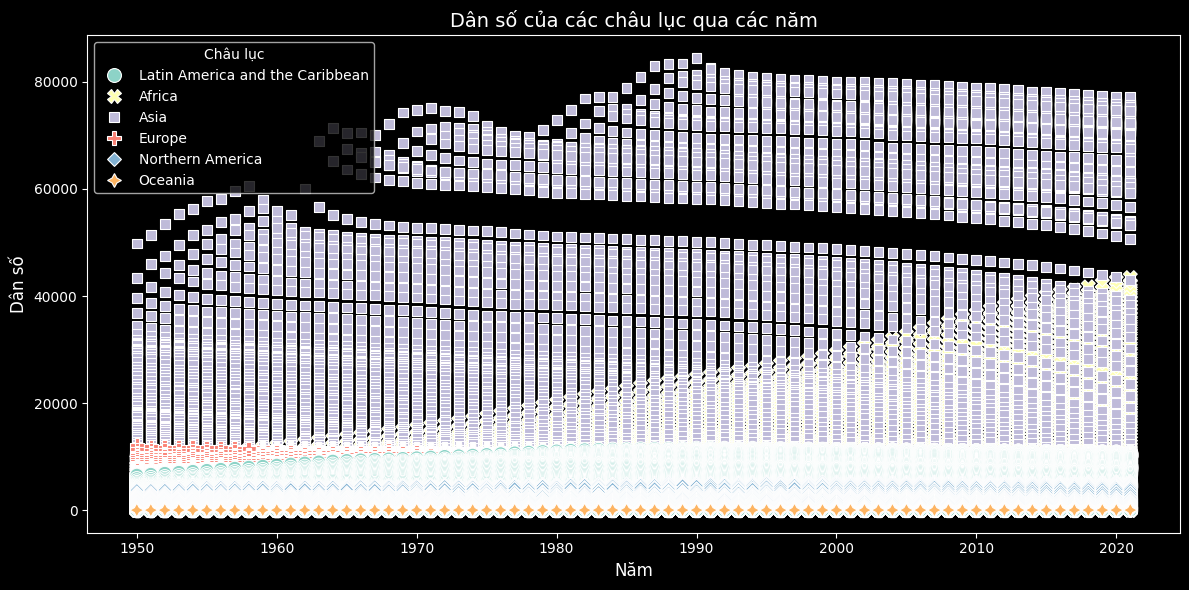

In [8]:
# Vẽ biểu đồ tán xạ cho dân số theo thời gian
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='PopTotal', hue='Location', style='Location', s=100)
plt.title('Dân số của các châu lục qua các năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Dân số', fontsize=12)
plt.legend(title='Châu lục')
plt.tight_layout()
plt.show()



### Pie Chart of Population Distribution in 1950



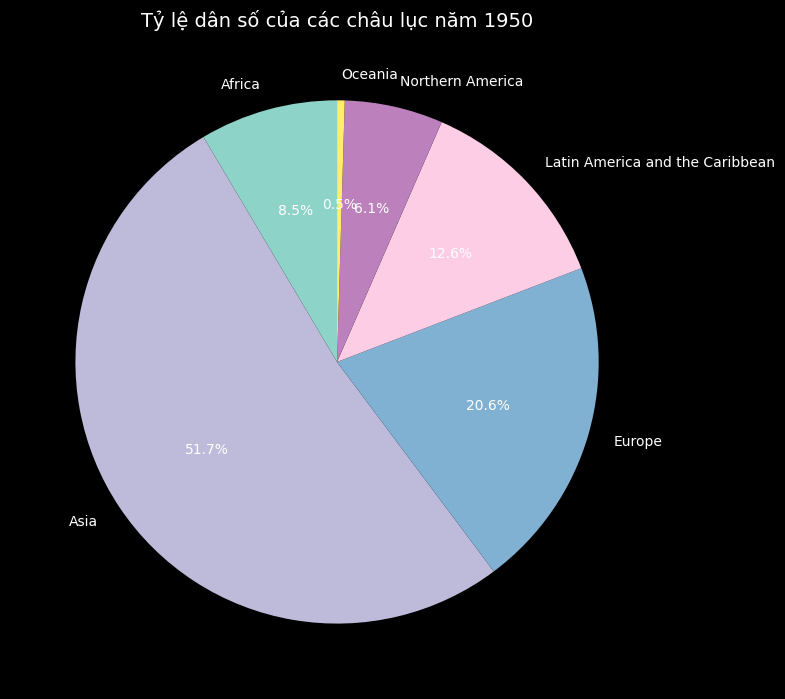

In [9]:
# Lọc dữ liệu cho năm 1950
df_1950 = df[df['Time'] == 1950]

# Tính tỷ lệ phần trăm dân số của các châu lục
population_1950 = df_1950.groupby('Location')['PopTotal'].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
population_1950.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Tỷ lệ dân số của các châu lục năm 1950', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()



### Heatmap of Population Over the Years



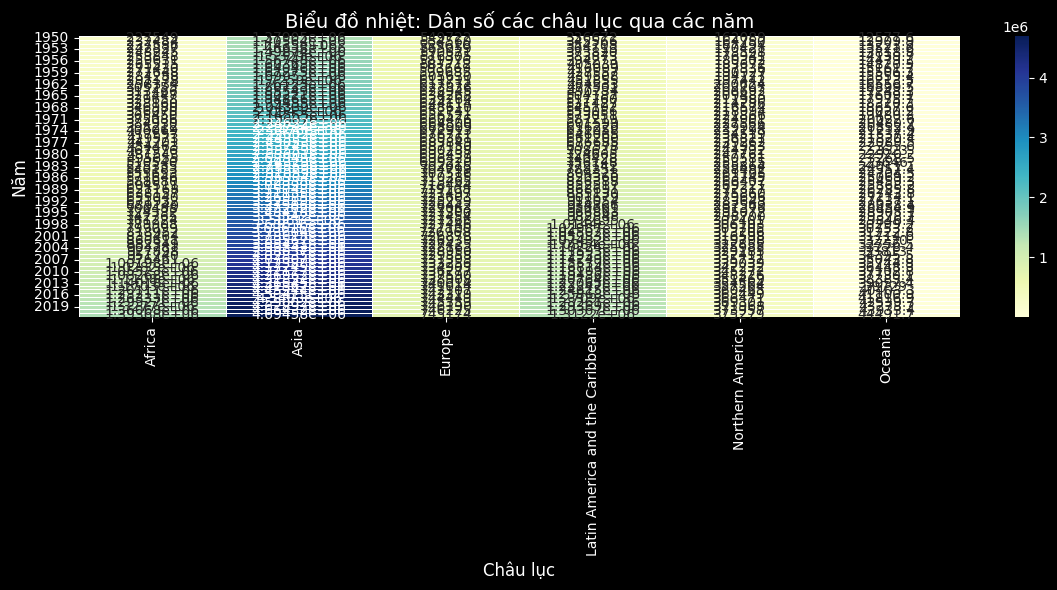

In [10]:
# Nhóm dữ liệu theo năm và châu lục, tính tổng dân số
df_heatmap = df.groupby(['Time', 'Location'])['PopTotal'].sum().unstack().fillna(0)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Biểu đồ nhiệt: Dân số các châu lục qua các năm', fontsize=14)
plt.xlabel('Châu lục', fontsize=12)
plt.ylabel('Năm', fontsize=12)
plt.tight_layout()
plt.show()



### Population Distribution by Gender in 1950 and 2021



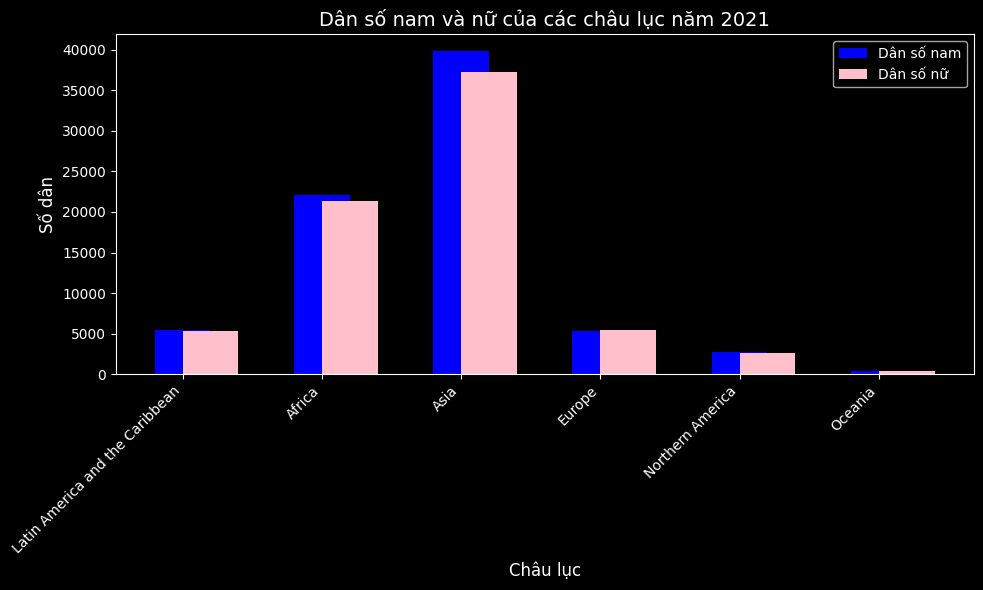

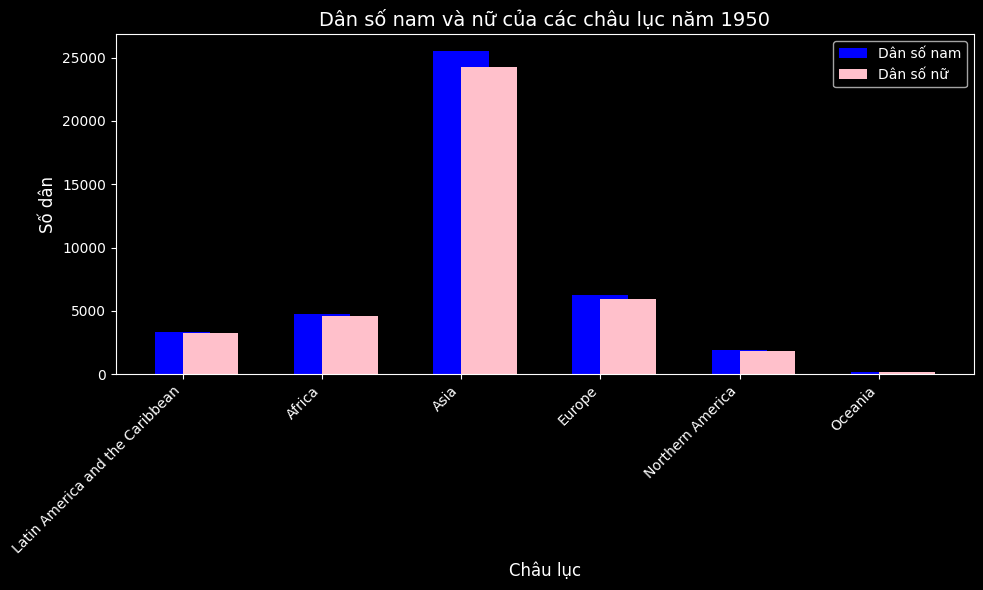

In [11]:
df_2021 = df_continents[df_continents['Time'] == 2021]

plt.figure(figsize=(10, 6))
x = df_2021['Location']
plt.bar(x, df_2021['PopMale'], width=0.4, label='Dân số nam', align='center', color='blue')
plt.bar(x, df_2021['PopFemale'], width=0.4, label='Dân số nữ', align='edge', color='pink')

plt.title('Dân số nam và nữ của các châu lục năm 2021', fontsize=14)
plt.xlabel('Châu lục', fontsize=12)
plt.ylabel('Số dân', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

df_1950 = df_continents[df_continents['Time'] == 1950]

plt.figure(figsize=(10, 6))
x = df_1950['Location']
plt.bar(x, df_1950['PopMale'], width=0.4, label='Dân số nam', align='center', color='blue')
plt.bar(x, df_1950['PopFemale'], width=0.4, label='Dân số nữ', align='edge', color='pink')

plt.title('Dân số nam và nữ của các châu lục năm 1950', fontsize=14)
plt.xlabel('Châu lục', fontsize=12)
plt.ylabel('Số dân', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



### Population Distribution by Age Group in Asia



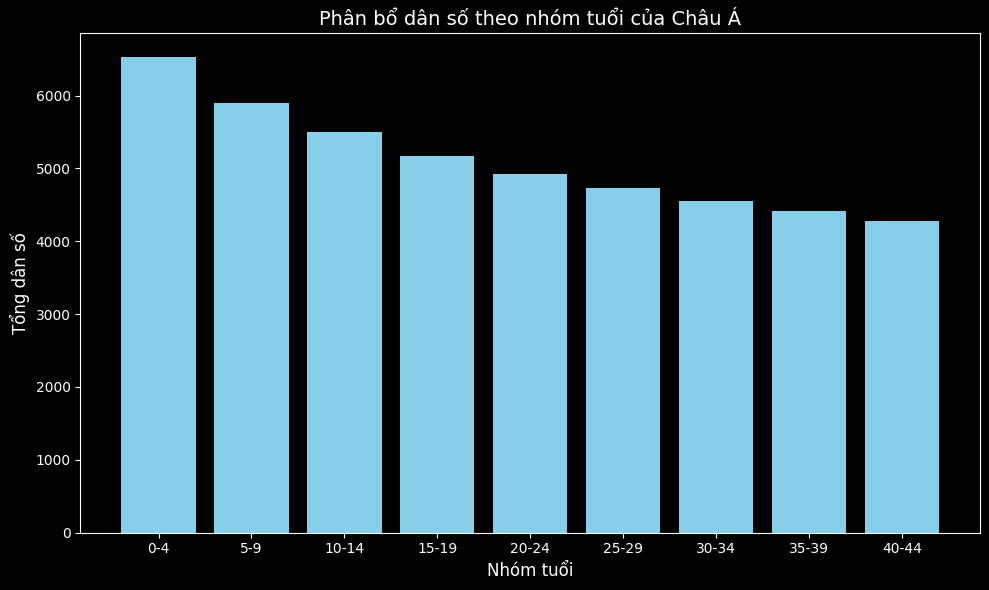

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV hoặc DataFrame
# df_continents = pd.read_csv('1950-2021')

# Giả lập dữ liệu từ dữ liệu bạn đã gửi
data = {
    'Location': ['Asia']*9,  # Tên châu lục
    'AgeGrp': [0, 1, 2, 3, 4, 5, 6, 7, 8],  # Nhóm tuổi
    'PopTotal': [6527, 5895, 5493, 5173, 4918, 4724, 4558, 4411, 4280]  # Tổng dân số
}
df_continents = pd.DataFrame(data)

# Lọc dữ liệu cho châu Á
df_asia = df_continents[df_continents['Location'] == 'Asia']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(df_asia['AgeGrp'], df_asia['PopTotal'], color='skyblue')

# Thêm tiêu đề và nhãn
plt.title('Phân bổ dân số theo nhóm tuổi của Châu Á', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Tổng dân số', fontsize=12)
plt.xticks(df_asia['AgeGrp'], [f'{age*5}-{age*5+4}' for age in df_asia['AgeGrp']])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()